<a href="https://colab.research.google.com/github/madhanmohans/Cross-Site-Scripting-Detection/blob/main/XSS_detection_%7C_Phase_1_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import io
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
df = pd.read_csv("/content/XSSDataset.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,Contains &lt,Contains &rt,Contains Script,Contains And,Contains Percentage,Contains BackSlash,Contains Plus,Contains Document,Contains Onerror,Contains DIV,...,Contains Space,Contains Break Line,Class,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,1,1,1,0,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,1,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,0,0,0,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,1,1,1,0,0,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,1,1,0,0,1,0,0,...,0,1,Malicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.loc[:, ~df.columns.str.match('Unnamed')]

In [7]:
df.head()

,Contains &lt,Contains &rt,Contains Script,Contains And,Contains Percentage,Contains BackSlash,Contains Plus,Contains Document,Contains Onerror,Contains DIV,...,Contains Underscore,Contains location,Contains Search,Contains &#,Contains Open Brace,Contains Close Brace,Contains tilde,Contains Space,Contains Break Line,Class
0,1,1,1,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious
1,1,1,1,1,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious
2,1,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Malicious
3,1,1,1,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Malicious
4,1,1,1,1,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,Malicious


In [8]:
pd.isnull(df).sum()

Contains &lt                  2
Contains &rt                  2
Contains Script               2
Contains And                  2
Contains Percentage           2
Contains BackSlash            2
Contains Plus                 2
Contains Document             2
Contains Onerror              2
Contains DIV                  2
Contains iframe               2
Contains img                  2
Contains SRC                  2
Contains Var                  2
Contains Eval                 2
Contains href                 2
Contains Cookie               2
Contains Single Quote         2
Contains Question Mark        2
Contains Exclamation Mark     2
Contains HTTPS                2
Contains JS                   2
Contains Hash                 2
Contains Equal                2
Contains Open Parenthesis     2
Contains Close Parenthesis    2
Contains Asterisk             2
Contains Comma                2
Contains Hyphen               2
Contains At                   2
Contains Underscore           2
Contains

In [9]:
df = df.dropna()

In [10]:
pd.isnull(df).sum()

Contains &lt                  0
Contains &rt                  0
Contains Script               0
Contains And                  0
Contains Percentage           0
Contains BackSlash            0
Contains Plus                 0
Contains Document             0
Contains Onerror              0
Contains DIV                  0
Contains iframe               0
Contains img                  0
Contains SRC                  0
Contains Var                  0
Contains Eval                 0
Contains href                 0
Contains Cookie               0
Contains Single Quote         0
Contains Question Mark        0
Contains Exclamation Mark     0
Contains HTTPS                0
Contains JS                   0
Contains Hash                 0
Contains Equal                0
Contains Open Parenthesis     0
Contains Close Parenthesis    0
Contains Asterisk             0
Contains Comma                0
Contains Hyphen               0
Contains At                   0
Contains Underscore           0
Contains

In [11]:
df['Contains &rt'].unique()

array([1, 0, '0', '1', '#ERROR!',
       ' ?�?�?� ?�?�?�?�?� ?�?�?�?� ?�?�?�???�?�?�?� ???�???�?�?�?�?�?�?� ?�?�?�?�?�?�?�?�?�.\\""; i18n[\\""open for editing in a new tab\\""] = \\""?�?�?�???�?�?�?� ?�?�?? ?�?�?�?�?�?�?�?�?�?�?? ?� ?�?�?�?�?� ?�???�?�?�?�?�\\""; i18n[\\""editor option\\""] = \\""?????�?�?� ?�?�?�?�???�?�?�?�\\""; i18n[\\""choose a theme\\""] = \\""?�?�?�?�?�?�?�?� ?�?�?�?�\\""; i18n[\\""no theme\\""] = \\""?�?�?� ?�?�?�?�\\""; i18n[\\""default theme\\""] = \\""?�?�?�?� ?�?� ???�?�?�?�?�?�?�?�?�???�\\""; /* i18n[\\""cobalt\\""] = \\""cobalt\\""; i18n[\\""eclipse\\""] = \\""eclipse\\""; i18n[\\""elegant\\""] = \\""elegant\\""; i18n[\\""monokai\\""] = \\""monokai\\""; i18n[\\""neat\\""] = \\""neat\\""; i18n[\\""night\\""] = \\""night\\""; i18n[\\""rubyblue\\""] = \\""rubyblue\\""; */// in file: ../../js/ui/component/editorconf.js i18n[\\""main\\""] = \\""?�?�?�?�?�?�?�?�\\""; i18n[\\""module \\\\\\""all files\\\\\\""\\""] = \\""?�?�?�?�?�?� \\\\\\""?�???� ?�?�?�?�?�\\\\\

In [12]:
df.shape

(43217, 40)

In [13]:
# remove #ERROR!, #REF!, and other miscellaneous records
ones_zeros = ['0', '1', 1 , 0]
for column in df.loc[:, df.columns != 'Class']:
  df.drop(df[(~df[column].isin(ones_zeros))].index, inplace=True)
  df[column] = df[column].astype(int)
  print(df[column].unique())

[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


In [14]:
df.shape

(43215, 40)

In [15]:
df['Class'].unique()

array(['Malicious', 'Benign'], dtype=object)

In [16]:
label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class']) 

In [17]:
df['Class'].unique()

array([1, 0])

In [18]:
array = df.values

X = array[0:,0:39]
Y = array[:,39]
# Y=Y.astype('int')

In [19]:
print("X rows: " , X)
print("Y rows: " , Y)

X rows:  [[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]]
Y rows:  [1 1 1 ... 1 1 1]


In [20]:
print(X.dtype)
print(Y.dtype)

int64
int64


In [21]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_scores = MIC(X,Y)
print(mi_scores)
mi_scores.size

[2.36948654e-01 2.37065150e-01 3.71596704e-01 3.71144678e-03
 6.57909863e-02 3.38416978e-04 1.13990256e-02 7.24450037e-02
 4.55130118e-03 1.20940476e-03 1.36952579e-02 6.26060678e-03
 3.49009236e-02 8.32745110e-03 4.01689755e-03 0.00000000e+00
 7.97731477e-02 2.41670032e-03 2.29826870e-01 2.68773644e-02
 9.00031512e-03 7.95334985e-03 1.30214633e-03 6.76024039e-02
 1.20949540e-01 1.22571805e-01 8.00802582e-04 6.25596716e-02
 4.04068859e-02 8.04936399e-04 3.79726651e-02 1.94830540e-02
 7.71001452e-02 0.00000000e+00 7.19295977e-03 0.00000000e+00
 7.13377329e-05 5.55056622e-02 3.95560722e-02]


39

In [49]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('K-nearest Neighbors', KNeighborsClassifier()))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

results = []
metrics = ['accuracy', 'precision', 'recall', 'f1']
lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(Y)])

for name, model in models:
  print(name)
  for metric in metrics:
    metricValue = model_selection.cross_val_score(model, X, y_train, cv=10, scoring=metric)
    print(metric, ": ", np.mean(metricValue))
    results.append(metricValue)

In [23]:
names = []
results = []
scoring = 'accuracy' 
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.968133 (0.058996)
LDA: 0.956771 (0.067610)
KNN: 0.963527 (0.081091)
CART: 0.926615 (0.125185)
NB: 0.935365 (0.106971)
SVM: 0.931498 (0.116604)


In [34]:
(np.unique(y_train, return_counts = True))

(array([0, 1]), array([28067, 15148]))

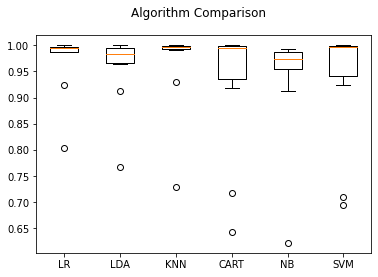

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()